importing important libraries

In [1]:
import networkx as nx                                                  
import matplotlib.pyplot as plt
import networkx.algorithms.community as nx_comm
import random
import numpy as np
from itertools import accumulate

reading the data set with nx.read_edgelist() function

In [2]:
G=nx.read_edgelist('Facebook.txt')
print(nx.info(G))

Graph with 4039 nodes and 88234 edges


C:\Users\Arijit Kundu\AppData\Local\Temp\ipykernel_912\4062144351.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


A copy of the graph is created and using nx_comm.louvain_communities(H) we get the communities in the Graph and it returns a set so we store it inside community_set

In [3]:
H=nx.Graph(G)
community_set = nx_comm.louvain_communities(H)
print("there is ",len(community_set),"communities in Facebook Dataset")
print(community_set)

there is  16 communities in Facebook Dataset
[{'249', '226', '258', '326', '247', '60', '179', '168', '215', '44', '254', '127', '201', '3003', '161', '311', '23', '273', '331', '33', '250', '109', '182', '14', '176', '294', '177', '89', '274', '2', '103', '163', '6', '230', '277', '75', '180', '21', '333', '255', '114', '346', '332', '296', '45', '142', '7', '67', '69', '268', '204', '212', '246', '156', '59', '269', '121', '286', '61', '219', '186', '235', '314', '90', '62', '272', '24', '150', '123', '85', '248', '284', '293', '267', '133', '52', '290', '318', '73', '335', '2704', '287', '16', '56', '232', '83', '116', '185', '214', '0', '87', '131', '339', '22', '1', '196', '288', '184', '329', '257', '205', '30', '143', '191', '1297', '337', '130', '132', '80', '68', '41', '120', '202', '221', '72', '8', '2740', '97', '262', '305', '106', '208', '32', '280', '292', '40', '146', '278', '225', '190', '343', '151', '299', '216', '42', '20', '19', '25', '159', '137', '308', '175', '11

here the list of set is converted into list of list and it is converted into list of list

In [4]:
community_list = []
for j in community_set:
    community_list.append(list(j))
print(community_list)

[['249', '226', '258', '326', '247', '60', '179', '168', '215', '44', '254', '127', '201', '3003', '161', '311', '23', '273', '331', '33', '250', '109', '182', '14', '176', '294', '177', '89', '274', '2', '103', '163', '6', '230', '277', '75', '180', '21', '333', '255', '114', '346', '332', '296', '45', '142', '7', '67', '69', '268', '204', '212', '246', '156', '59', '269', '121', '286', '61', '219', '186', '235', '314', '90', '62', '272', '24', '150', '123', '85', '248', '284', '293', '267', '133', '52', '290', '318', '73', '335', '2704', '287', '16', '56', '232', '83', '116', '185', '214', '0', '87', '131', '339', '22', '1', '196', '288', '184', '329', '257', '205', '30', '143', '191', '1297', '337', '130', '132', '80', '68', '41', '120', '202', '221', '72', '8', '2740', '97', '262', '305', '106', '208', '32', '280', '292', '40', '146', '278', '225', '190', '343', '151', '299', '216', '42', '20', '19', '25', '159', '137', '308', '175', '118', '15', '313', '82', '1486', '264', '29', '

K shell function is made to find out the community cores! cores at the end of the list are cores with higher degrees

In [5]:
def check(H,d):
    f = 0 
    for j in H:
        if (H.degree(j) <= d):
            f = 1
            break
    return f
  
def find_nodes(H, it):
    set1 = []
    for j in H:
        if (H.degree(j) <= it):
            set1.append(j)
    return set1
  
def k_shell(H):  
    it = 1
    tmp = []
    buckets = []
    while (1):
        flag = check(H, it)
        if (flag == 0):
            it += 1
            buckets.append(tmp)
            tmp = []
        if (flag == 1):
            node_set = find_nodes(H, it)
            for each in node_set:
                copy_graph.remove_node(each)
                tmp.append(each)
        if (H.number_of_nodes() == 0):
            buckets.append(tmp)
            return buckets
            break
               

here k-shell is applied and the community list of list is stored into list_core

In [6]:
copy_graph = nx.Graph(H)
list_core = []
k_com = nx.Graph()
other_com = nx.Graph()
for i in community_list:
    k_com = copy_graph.subgraph(i)
    k_core=k_shell(k_com)
    list_core.append((k_core))
print(list_core)

[[['210', '209', '43', '215', '114', '335', '2704', '287', '292', '15', '37', '11', '74', '12', '2814', '18', '2740'], ['33', '90', '305', '153', '183', '233', '154', '70', '145', '316', '241', '255', '286', '267', '52', '205', '216', '42', '166', '1193', '160', '35', '282', '244', '47', '138', '279', '256', '234', '202', '49', '301', '179', '81', '192'], ['247', '3003', '182', '294', '293', '1297', '336', '157', '76', '164', '2838', '1387', '228', '61', '191', '120', '97', '1486', '112', '207', '321', '2885', '253', '240', '3290', '155', '125', '71', '307', '124', '270', '174', '58'], ['201', '230', '288', '190', '283', '220', '206', '269', '262', '193', '289', '327'], ['250', '46', '245', '27', '95', '163', '219', '235', '264', '110', '152', '77', '229', '89', '117', '319', '91', '6', '8', '147', '259'], ['44', '32', '102', '171', '260', '86', '63', '340', '189', '126', '296', '64', '263', '167', '93', '217', '100', '243', '150', '337'], ['83', '131', '151', '317', '300', '129', '54'

storing the cores with Higher degree in a list called k_core_list and also the lengths of the cores are stored inside leng list

In [7]:
k_core_list = []
leng=[];
for i in list_core:
    length = len(i)-1
    k_core_list.append(i[length])       

for i in k_core_list:
    leng.append(len(i))

print(k_core_list)    
print(leng)

[['272', '265', '297', '261', '211', '118', '172', '128', '40', '313', '223', '13', '169', '315', '199', '280', '342', '332', '325', '323', '109', '142', '304', '9', '98', '104', '113', '119', '67', '186', '25', '239', '122', '200', '203', '271', '252', '277', '21', '56', '0', '285', '322', '26', '170', '188'], ['1647', '1060', '1009', '1872', '1859', '1432', '1279', '1841', '1655', '1423', '1284', '1680', '1862', '1716', '1448', '1100', '1587', '1021', '1257', '1158', '1413', '1715', '1576', '1426', '1036', '1082', '1231', '1292', '1591', '1691', '975', '1120', '1019', '1148', '981', '1404', '902', '1129', '1459', '1067', '1235', '957', '1628', '1479', '1636', '1277', '1475', '1899', '1462', '1596', '896', '1611', '1227', '1347', '1322', '1104', '1204', '1573', '1192', '1857', '1583', '1298', '1379', '1345'], ['1191', '1675', '1289', '1809', '1124', '1128', '1243', '1163', '1789', '1712', '1619', '921', '934', '1600', '1826', '1339', '1175', '1370', '1563', '1181', '1868', '1623', '11

Defining a H_index function that returns H index of any list

In [8]:
def H_index(citations):
    citations.sort()
    for index, cited in enumerate(citations):
        result = len(citations) - index
        if result <= cited:
            return result
    return 0

defining a function that can return the H_index of any node's neighbours list's H_index

In [9]:
def Node_H_index(node):
    neig_list=G.neighbors(node)
    degree_list=[]
    for neighbour in neig_list:
        degree_list.append(G.degree(neighbour))
    h_index = H_index(degree_list)
    return h_index

defing a functiion that can return the Extended_h_index of a node

In [10]:
def Extended_H_index(node):
    h_index = Node_H_index(node)
    h_sum = 0
    for n in G.neighbors(node):
        h_sum = h_sum + Node_H_index(n)
    return h_index + h_sum

K core lists in every community and their extended H index

In [11]:
extended_list = []
new_extended_list=[]
rev_list=[]

for i in k_core_list:
    length=len(i)
    for j in i:
        extended_list.append(Extended_H_index(j))
print("K core list:",k_core_list)        
print("List of Extended H_index of cores:", extended_list )
new_extended_list = [extended_list[x - y: x] for x, y in zip(accumulate(leng), leng)]
print("Extended H_index of core_list:",new_extended_list)
print("Length of the cores in core_list:",leng)

K core list: [['272', '265', '297', '261', '211', '118', '172', '128', '40', '313', '223', '13', '169', '315', '199', '280', '342', '332', '325', '323', '109', '142', '304', '9', '98', '104', '113', '119', '67', '186', '25', '239', '122', '200', '203', '271', '252', '277', '21', '56', '0', '285', '322', '26', '170', '188'], ['1647', '1060', '1009', '1872', '1859', '1432', '1279', '1841', '1655', '1423', '1284', '1680', '1862', '1716', '1448', '1100', '1587', '1021', '1257', '1158', '1413', '1715', '1576', '1426', '1036', '1082', '1231', '1292', '1591', '1691', '975', '1120', '1019', '1148', '981', '1404', '902', '1129', '1459', '1067', '1235', '957', '1628', '1479', '1636', '1277', '1475', '1899', '1462', '1596', '896', '1611', '1227', '1347', '1322', '1104', '1204', '1573', '1192', '1857', '1583', '1298', '1379', '1345'], ['1191', '1675', '1289', '1809', '1124', '1128', '1243', '1163', '1789', '1712', '1619', '921', '934', '1600', '1826', '1339', '1175', '1370', '1563', '1181', '1868'

Finding out max Extended h index values of the nodes and their indexes 

In [12]:
max_extended_h_index=[]
index_list=[]
for i in new_extended_list:
    max_extended_h_index.append(max(i))
    index_list.append(i.index(max(i)))

print("Maximum extended h indexes:",max_extended_h_index)
print("Their index value:",index_list)

Maximum extended h indexes: [4206, 5683, 41686, 1167, 8811, 520, 294, 2611, 21912, 361, 6779, 3016, 48123, 32660, 832, 7736]
Their index value: [40, 50, 140, 17, 43, 14, 9, 17, 21, 12, 68, 63, 115, 73, 8, 48]


Finally using the indexes we find out the cores

In [13]:
seed=[]
for x,y in zip(k_core_list,index_list):
    seed.append(x[y])
print(seed)

['0', '896', '107', '1371', '483', '583', '3980', '686', '1684', '3309', '2839', '1972', '1912', '2347', '2622', '3437']


Coppying the cores in a new list for safety

In [14]:
copy_seeds=[]
copy_seeds=seed.copy()
print(copy_seeds)
print(len(copy_seeds))

['0', '896', '107', '1371', '483', '583', '3980', '686', '1684', '3309', '2839', '1972', '1912', '2347', '2622', '3437']
16


all the seed nodes in decending order of Extended H index with their Extended H index values

In [ ]:
my_dict={copy_seeds[i]: max_extended_h_index[i] for i in range(len(copy_seeds))}
# print(my_dict)
# print(my_dict.values())
sorted_dict={k: v for k,v in sorted(my_dict.items(), key = lambda v:v[1], reverse = True)}
print(sorted_dict)

Independent Cascade Model Function

In [ ]:
def ic(G, s, act_prbo):    
    jst_inf = s
    infected = s
    
    while(1):
        
        if len(jst_inf)==0:
            return infected
        else:
            temp=[]
            for each in jst_inf:
                for each1 in G.neighbors(each):
                    r=random.uniform(0,1)
                    if r<act_prbo and each1 not in infected and each1 not in temp:
                        temp.append(each1)
            for each1 in temp:
                infected.append(each1)
            jst_inf=temp

In [32]:
# print(ic(G,seed,0.5))

neighbours of the seed node is found

In [18]:
print("Seed nodes",copy_seeds)
seed_neighbour_list=[]
for i in copy_seeds:
    neighbour_list = [n for n in H.neighbors(i)]
    seed_neighbour_list.append(neighbour_list)
print(seed_neighbour_list)

Seed nodes ['0', '896', '107', '1371', '483', '583', '3980', '686', '1684', '3309', '2839', '1972', '1912', '2347', '2622', '3437']
[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '

All the nodes are added in a single list,duplicate nodes are taken as single nodes

In [19]:
node_n_list=[]
for i in seed_neighbour_list:
    for j in i:
        
        node_n_list.append(j)
final_set=((set)(node_n_list))
final_list=list(final_set)
print(final_list)

['1811', '2746', '3078', '2377', '1224', '2788', '2094', '604', '3607', '2694', '44', '2158', '942', '1745', '161', '1336', '2753', '2311', '2641', '3766', '755', '331', '33', '912', '2353', '250', '1074', '2471', '3970', '1198', '1370', '3666', '1576', '3743', '3309', '3825', '3877', '176', '2047', '3950', '2464', '2310', '3216', '177', '838', '1843', '3501', '103', '3737', '1333', '1976', '1581', '3336', '1430', '1118', '2875', '1569', '3976', '2974', '2799', '2686', '3143', '2267', '3016', '3697', '212', '1763', '59', '2197', '3834', '1473', '813', '860', '3221', '820', '2214', '3794', '1407', '2705', '1512', '1457', '3169', '90', '2279', '2745', '2882', '2189', '1368', '1365', '3828', '2402', '284', '3665', '133', '3310', '73', '1324', '3586', '2040', '1784', '1716', '3168', '3179', '1048', '3823', '3319', '724', '3273', '2912', '1149', '1537', '2069', '3428', '736', '1782', '1866', '500', '3542', '131', '1344', '3543', '2849', '2499', '288', '3238', '1699', '4037', '257', '1880', 

Candidate solution is found by deleting seed node's neighbours and adding it with seed nodes

In [20]:
Node_list=H.nodes()
rest_list=Node_list-final_list
candidate_solution=list(rest_list)+copy_seeds
candidate_solution = set(candidate_solution)
# print(candidate_solution)
candidate_solution = list(candidate_solution)
# print(candidate_solution)
print("Nodes left after deleting seed node's neighbours:",candidate_solution)
print("Core number:",len(candidate_solution))

Nodes left after deleting seed node's neighbours: ['357', '663', '653', '381', '433', '585', '619', '512', '354', '549', '678', '682', '468', '490', '361', '547', '630', '618', '684', '871', '878', '2622', '384', '421', '464', '529', '539', '679', '434', '442', '558', '569', '572', '626', '872', '584', '590', '556', '620', '881', '390', '861', '407', '607', '415', '362', '453', '642', '550', '454', '583', '674', '2839', '350', '505', '3309', '448', '613', '633', '440', '470', '564', '359', '3437', '686', '885', '895', '488', '396', '534', '399', '589', '622', '418', '603', '426', '892', '587', '593', '508', '531', '866', '634', '873', '668', '673', '1371', '859', '863', '676', '530', '411', '429', '874', '452', '409', '570', '616', '478', '474', '518', '865', '386', '469', '575', '360', '401', '379', '876', '423', '624', '372', '597', '458', '437', '485', '481', '393', '472', '532', '536', '427', '483', '646', '638', '498', '447', '864', '657', '623', '413', '107', '612', '875', '2347'

First 10 among 16 seed nodes are taken

In [21]:
decending_seed_list=list(sorted_dict.keys())
adjustList = decending_seed_list.copy()
print(adjustList)
print(len(adjustList))
print(adjustList [0:10])

['1912', '107', '2347', '1684', '483', '3437', '2839', '896', '0', '1972', '686', '1371', '2622', '583', '3309', '3980']
16
['1912', '107', '2347', '1684', '483', '3437', '2839', '896', '0', '1972']


Final Calculation is done here,
For first 10 nodes, 10 nodes are taken from 16 seed nodes
For first 20 nodes, 16 from seed and rest from the highest Extended H index list and run ic model 20 times and avg is found
For first 30 nodes, 16 from seed and rest from the highest Extended H index list and run ic model 20 times and avg is found
For first 40 nodes, 16 from seed and rest from the highest Extended H index list and run ic model 20 times and avg is found
For first 50 nodes, 16 from seed and rest from the highest Extended H index list and run ic model 20 times and avg is found

In [40]:
def final_calculation(K):
    adjustList = decending_seed_list.copy()
    if K < len(community_list):
        decending_list = adjustList[0:K]
        print("Best ",len(decending_list)," are: ", decending_list)

        lenList=[]
        tempList=[]

        for i in range(20):
            tempList= ic(H,adjustList,0.5)
            print(i,end="-->")
            lenList.append(len(tempList))
        print("\n",lenList)

        average = sum(lenList)/len(lenList)
        return average
    
    else:
        candidateIndex_list = []
        for i in candidate_solution:
            candidateIndex_list.append(Extended_H_index(i))


        my_dict1={candidate_solution[i]: candidateIndex_list[i] for i in range(len(candidate_solution))}
        candidate_decending={k: v for k,v in sorted(my_dict1.items(), key = lambda v:v[1], reverse = True)}


        rest_nodes=list(candidate_decending.keys())
        temp3 = []
        for element in rest_nodes:
            if element not in adjustList:
                temp3.append(element)

        val = len(adjustList)
        op_list = adjustList + temp3[0 :(K - val)]

        print("Best ",len(op_list)," are: ", op_list)
        len1List=[]
        temp1List=[]

        for i in range(20):
            temp1List= ic(H,adjustList,0.5)
            print(i,end="-->")
            len1List.append(len(temp1List))
        print("\n",len1List)

        average1 = sum(len1List)/len(len1List)
        return average1

a new list is taken and given values 10,20,30,40,50

In [34]:
kList=[]

k1 = 10
k2 = 20
k3 = 30
k4 = 40
k5 = 50

kList.append(k1)
kList.append(k2)
kList.append(k3)
kList.append(k4)
kList.append(k5)

print(kList)

[10, 20, 30, 40, 50]


Final Calculation is Done here

In [35]:
valueList = []

v1 = final_calculation(10)
v2 = final_calculation(20)
v3 = final_calculation(30)
v4 = final_calculation(40)
v5 = final_calculation(50)

valueList.append(v1)
valueList.append(v2)
valueList.append(v3)
valueList.append(v4)
valueList.append(v5)

print(valueList)

Best  10  are:  ['1912', '107', '2347', '1684', '483', '3437', '2839', '896', '0', '1972']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [3938, 4003, 4024, 4031, 4033, 4037, 4038, 4038, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039]
Best  20  are:  ['1912', '107', '2347', '1684', '483', '3437', '2839', '896', '0', '1972', '686', '1371', '2622', '583', '3309', '3980', '400', '456', '460', '402']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [3953, 4016, 4030, 4033, 4036, 4036, 4037, 4037, 4038, 4038, 4038, 4038, 4038, 4039, 4039, 4039, 4039, 4039, 4039, 4039]
Best  30  are:  ['1912', '107', '2347', '1684', '483', '3437', '2839', '896', '0', '1972', '686', '1371', '2622', '583', '3309', '3980', '400', '456', '460', '402', '423', '545', '556', '523', '439', '360', '387', '452', '394', '683']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-

In [41]:
# plt.plot(kList,valueList, 'ro-')
# plt.xlabel('Number of Seed Nodes ')
# plt.ylabel('Number of Edge ')
# plt.title('Proposed model Graph')
# plt.show()

highest 50 nodes based on degree is found

Best  10  are:  ['107', '1684', '1912', '3437', '0', '2543', '2347', '1888', '1800', '1663']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [3947, 4013, 4029, 4035, 4035, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039]
Best  20  are:  ['107', '1684', '1912', '3437', '0', '2543', '2347', '1888', '1800', '1663', '1352', '2266', '483', '348', '1730', '1985', '1941', '2233', '2142', '1431']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [3907, 3967, 3973, 4028, 4036, 4038, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039]
Best  30  are:  ['107', '1684', '1912', '3437', '0', '2543', '2347', '1888', '1800', '1663', '1352', '2266', '483', '348', '1730', '1985', '1941', '2233', '2142', '1431', '1199', '1584', '2206', '1768', '2229', '2410', '2611', '1086', '1589', '2047']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13--

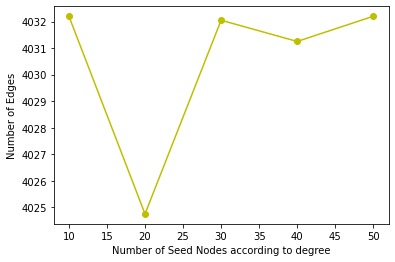

In [26]:
#Degree
degreeDict={}
for node in G.nodes():
    degreeDict[node] = G.degree(node)
degree_decending = {k: v for k,v in sorted(degreeDict.items(), key = lambda v:v[1], reverse = True)}
# print(degree_decending)
keysD = []
valD = []
finalDlist = []
for vals in degree_decending.values():
    valD.append(vals)
for keys in degree_decending.keys():
    keysD.append(keys)

def Dcal(K):
    decendingD_list = keysD[0: K]
    print("Best ",len(decendingD_list)," are: ", decendingD_list)
    lenDList=[]
    tempDList=[]
    for i in range(20):
        tempDList= ic(H,decendingD_list,0.5)
        print(i,end="-->")
        lenDList.append(len(tempDList))
    print("\n",lenDList)
    averageD = sum(lenDList)/len(lenDList)
    return averageD

D1 = Dcal(10)
D2 = Dcal(20)
D3 = Dcal(30)
D4 = Dcal(40)
D5 = Dcal(50)

finalDlist.append(D1)
finalDlist.append(D2)
finalDlist.append(D3)
finalDlist.append(D4)
finalDlist.append(D5)


# plt.plot(kList,finalDlist, 'yo-')
# plt.xlabel('Number of Seed Nodes according to degree')
# plt.ylabel('Number of Edges')
# plt.show()

highest 50 nodes based on betweenness is found

Best  10  are:  ['107', '1684', '3437', '1912', '1085', '0', '698', '567', '58', '428']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [3934, 4009, 4027, 4036, 4038, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039]
Best  20  are:  ['107', '1684', '3437', '1912', '1085', '0', '698', '567', '58', '428', '563', '860', '414', '1577', '348', '1718', '686', '594', '136', '3980']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [3947, 4012, 4028, 4033, 4038, 4038, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039]
Best  30  are:  ['107', '1684', '3437', '1912', '1085', '0', '698', '567', '58', '428', '563', '860', '414', '1577', '348', '1718', '686', '594', '136', '3980', '1465', '171', '862', '483', '2543', '3830', '376', '1666', '1420', '1534']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-

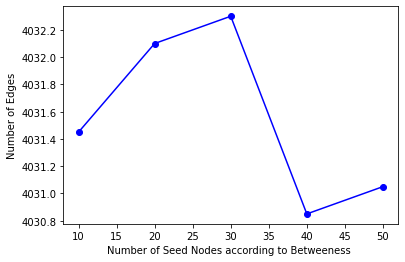

In [27]:
#betweenness_centrality
betweenDict = nx.betweenness_centrality(G)
decBetweennessDict = {k: v for k,v in sorted(betweenDict.items(), key = lambda v:v[1], reverse = True)}
# print(decBetweennessDict)
keysB = []
valsB = []
finalB_val = []
for i in decBetweennessDict.keys():
    keysB.append(i)
for j in decBetweennessDict.values():
    valsB.append(j)


def BCcal(K):
    decendingBC_list = keysB[0: K]
    print("Best ",len(decendingBC_list)," are: ", decendingBC_list)
    lenBCList=[]
    tempBCList=[]
    for i in range(20):
        tempBCList= ic(H,decendingBC_list,0.5)
        print(i,end="-->")
        lenBCList.append(len(tempBCList))
    print("\n",lenBCList)
    averageBC = sum(lenBCList)/len(lenBCList)
    return averageBC

BC1 = BCcal(10)
BC2 = BCcal(20)
BC3 = BCcal(30)
BC4 = BCcal(40)
BC5 = BCcal(50)

finalB_val.append(BC1)
finalB_val.append(BC2)
finalB_val.append(BC3)
finalB_val.append(BC4)
finalB_val.append(BC5)


# plt.plot(kList,finalB_val, 'bo-')
# plt.xlabel('Number of Seed Nodes according to Betweeness ')
# plt.ylabel('Number of Edges')
# plt.show()

highest 50 nodes based on page rank is found

In [ ]:
#pagerank_numpy
page_rank = nx.pagerank_numpy(H)
decendingPR = {k: v for k,v in sorted(page_rank.items(), key = lambda v:v[1], reverse = True)}
# print(decendingPG)

keysPR = []
valuesPR = []
for i in decendingPR.keys():
    keysPR.append(i)
for j in decendingPR.values():
    valuesPR.append(j)

finalPR=[]

def PRcal(K):
    decendingPR_list = keysPR[0: K]
    print("Best ",len(decendingPR_list)," are: ", decendingPR_list)
    lenPRList=[]
    tempPRList=[]
    for i in range(20):
        tempPRList= ic(H,decendingPR_list,0.5)
        print(i,end="-->")
        lenPRList.append(len(tempPRList))
    print("\n",lenPRList)
    averagePR = sum(lenPRList)/len(lenPRList)
    return averagePR

PR1 = PRcal(10)
PR2 = PRcal(20)
PR3 = PRcal(30)
PR4 = PRcal(40)
PR5 = PRcal(50)

finalPR.append(PR1)
finalPR.append(PR2)
finalPR.append(PR3)
finalPR.append(PR4)
finalPR.append(PR5)

plt.plot(kList,finalPR)
plt.xlabel('Number of Seed Nodes according to Pagerank')
plt.ylabel('Number of Edges')
plt.show()

C:\Users\Arijit Kundu\AppData\Local\Temp\ipykernel_912\1946808737.py:2: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  page_rank = nx.pagerank_numpy(H)


Best  10  are:  ['3437', '107', '1684', '0', '1912', '348', '686', '3980', '414', '483']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [3955, 4009, 4028, 4032, 4035, 4037, 4038, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039]
Best  20  are:  ['3437', '107', '1684', '0', '1912', '348', '686', '3980', '414', '483', '698', '3830', '376', '2047', '56', '25', '828', '322', '475', '67']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [3948, 4013, 4025, 4033, 4037, 4037, 4038, 4038, 4038, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039]
Best  30  are:  ['3437', '107', '1684', '0', '1912', '348', '686', '3980', '414', '483', '698', '3830', '376', '2047', '56', '25', '828', '322', '475', '67', '428', '3596', '713', '271', '3545', '3938', '119', '563', '2313', '1888']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [3

highest 50 nodes based on H-index is found

Best  10  are:  ['1912', '2347', '1985', '2266', '2090', '2142', '2206', '2340', '2507', '2030']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [3945, 4011, 4027, 4036, 4036, 4037, 4038, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039]
Best  20  are:  ['1912', '2347', '1985', '2266', '2090', '2142', '2206', '2340', '2507', '2030', '2088', '2131', '2218', '2233', '2240', '2244', '2464', '2586', '2604', '2543']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [3959, 4019, 4034, 4038, 4038, 4038, 4038, 4038, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039]
Best  30  are:  ['1912', '2347', '1985', '2266', '2090', '2142', '2206', '2340', '2507', '2030', '2088', '2131', '2218', '2233', '2240', '2244', '2464', '2586', '2604', '2543', '1962', '1983', '2073', '2078', '2118', '2220', '2410', '2542', '1917', '1938']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-

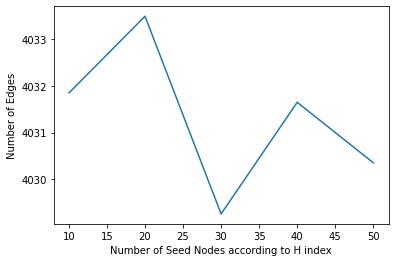

In [29]:
#H-index
HindexDegree = {}
decHindexDegree = {}
for nodes in G.nodes():
    HindexDegree[nodes] = Node_H_index(nodes)
# print(ExtendedDegree)
decHindexDegree = {k: v for k,v in sorted(HindexDegree.items(), key = lambda v:v[1], reverse = True)}
# print(decExtended)

keysH = []
valuesH = []
for i in decHindexDegree.keys():
    keysH.append(i)
for j in decHindexDegree.values():
    valuesH.append(j)
finalH=[]

def Hcal(K):
    decHindexDegree = keysH[0: K]
    print("Best ",len(decHindexDegree)," are: ", decHindexDegree)
    lenHList=[]
    tempHList=[]
    for i in range(20):
        tempHList= ic(H,decHindexDegree,0.5)
        print(i,end="-->")
        lenHList.append(len(tempHList))
    print("\n",lenHList)
    averageH = sum(lenHList)/len(lenHList)
    return averageH

H1 = Hcal(10)
H2 = Hcal(20)
H3 = Hcal(30)
H4 = Hcal(40)
H5 = Hcal(50)

finalH.append(H1)
finalH.append(H2)
finalH.append(H3)
finalH.append(H4)
finalH.append(H5)

plt.plot(kList,finalH)
plt.xlabel('Number of Seed Nodes according to H index')
plt.ylabel('Number of Edges')
plt.show()

highest 50 nodes based on Extended H index is found

Best  10  are:  ['1912', '107', '2347', '2543', '2266', '2233', '1985', '2142', '2206', '2218']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [3897, 4001, 4024, 4036, 4038, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039]
Best  20  are:  ['1912', '107', '2347', '2543', '2266', '2233', '1985', '2142', '2206', '2218', '2078', '2464', '2410', '2123', '1993', '2229', '2244', '2240', '2507', '2340']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [3958, 4012, 4033, 4037, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039, 4039]
Best  30  are:  ['1912', '107', '2347', '2543', '2266', '2233', '1985', '2142', '2206', '2218', '2078', '2464', '2410', '2123', '1993', '2229', '2244', '2240', '2507', '2340', '2088', '2611', '2604', '2131', '2309', '2073', '2560', '2369', '2590', '2220']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->1

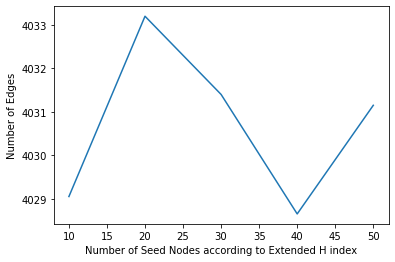

In [30]:
#Extended H Index
ExtendedHDegree = {}
decExtendedH = {}
for nodes in G.nodes():
    ExtendedHDegree[nodes] = Extended_H_index(nodes)
decExtendedH = {k: v for k,v in sorted(ExtendedHDegree.items(), key = lambda v:v[1], reverse = True)}

keysEH = []
valuesEH = []
for i in decExtendedH.keys():
    keysEH.append(i)
for j in decExtendedH.values():
    valuesEH.append(j)
finalEH=[]

def EHcal(K):
    decExtendedH = keysEH[0: K]
    print("Best ",len(decExtendedH)," are: ", decExtendedH)
    lenEHList=[]
    tempEHList=[]
    for i in range(20):
        tempEHList= ic(H,decExtendedH,0.5)
        print(i,end="-->")
        lenEHList.append(len(tempEHList))
    print("\n",lenEHList)
    averageEH = sum(lenEHList)/len(lenEHList)
    return averageEH

EH1 = EHcal(10)
EH2 = EHcal(20)
EH3 = EHcal(30)
EH4 = EHcal(40)
EH5 = EHcal(50)

finalEH.append(EH1)
finalEH.append(EH2)
finalEH.append(EH3)
finalEH.append(EH4)
finalEH.append(EH5)

plt.plot(kList,finalEH)
plt.xlabel('Number of Seed Nodes according to Extended H index')
plt.ylabel('Number of Edges')
plt.show()


Final graph plotting

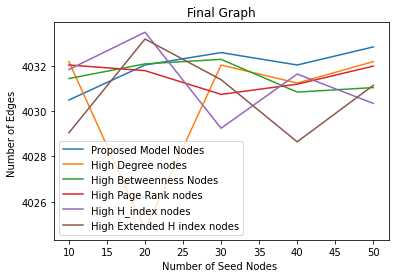

In [42]:
plt.plot(kList,valueList,label='Proposed Model Nodes')
plt.plot(kList,finalDlist, label='High Degree nodes')
plt.plot(kList,finalB_val, label='High Betweenness Nodes')
plt.plot(kList,finalPR, label='High Page Rank nodes')
plt.plot(kList,finalH, label='High H_index nodes')
plt.plot(kList,finalEH, label='High Extended H index nodes')


plt.xlabel('Number of Seed Nodes ')
plt.ylabel('Number of Edges ')
plt.title('Final Graph')
plt.legend()
plt.show()